In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneGroupOut, StratifiedShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import permutation_test_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from collections import Counter
from scipy import stats
%matplotlib inline

In [2]:
sns.set_context('paper', font_scale=2.5)
sns.set_style('white')

In [12]:
exp1 = pd.read_csv("df1_tb7.csv")
exp2 = pd.read_csv("df2_tb7.csv")

In [13]:
exp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27218 entries, 7 to 24959
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          27218 non-null  int64  
 1   gender            27218 non-null  int64  
 2   year              27218 non-null  int64  
 3   education         27218 non-null  int64  
 4   dist              27218 non-null  float64
 5   trial_type        27218 non-null  object 
 6   rt                27218 non-null  float64
 7   response          27218 non-null  object 
 8   key_press         27218 non-null  object 
 9   condition         27218 non-null  object 
 10  correct_response  27218 non-null  object 
 11  correct           27218 non-null  bool   
 12  word              27218 non-null  object 
 13  Image             27218 non-null  object 
 14  shape_en          27218 non-null  object 
 15  valence           27218 non-null  object 
 16  ACC               27218 non-null  int64 

In [14]:
exp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27142 entries, 7 to 24719
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          27142 non-null  int64  
 1   gender            27142 non-null  int64  
 2   year              27142 non-null  int64  
 3   education         27142 non-null  int64  
 4   dist              27142 non-null  float64
 5   trial_type        27142 non-null  object 
 6   rt                27142 non-null  float64
 7   response          27142 non-null  object 
 8   key_press         27142 non-null  object 
 9   condition         27142 non-null  object 
 10  correct_response  27142 non-null  object 
 11  correct           27142 non-null  bool   
 12  word              27142 non-null  object 
 13  Image             27142 non-null  object 
 14  shape_en          27142 non-null  object 
 15  valence           27142 non-null  object 
 16  ACC               27142 non-null  int64 

In [15]:
onehot_v1 = pd.get_dummies(exp1[["valence", "valence_1", "valence_2", "valence_3", "valence_4", "valence_5", "valence_6", "valence_7"]])

In [16]:
exp1 = pd.concat([exp1, onehot_v1], axis=1)

In [17]:
exp1 = exp1.drop(["valence", "valence_1", "valence_2", "valence_3", "valence_4", "valence_5", "valence_6", "valence_7"], axis=1)

In [18]:
onehot_v2 = pd.get_dummies(exp2[["valence", "valence_1", "valence_2", "valence_3", "valence_4", "valence_5", "valence_6", "valence_7"]])

In [19]:
exp2 = pd.concat([exp2, onehot_v2], axis=1)

In [20]:
exp2 = exp2.drop(["valence", "valence_1", "valence_2", "valence_3", "valence_4", "valence_5", "valence_6", "valence_7"], axis=1)

In [21]:
df1_sim = exp1[exp1.condition == "simultaneous"]
df1_word = exp1[exp1.condition == "word_first"]
df1_img = exp1[exp1.condition == "image_first"]
df2_sim = exp2[exp2.condition == "simultaneous"]
df2_word = exp2[exp2.condition == "word_first"]
df2_img = exp2[exp2.condition == "image_first"]

In [22]:
y1_sim = df1_sim["matchness"].values
y1_word = df1_word["matchness"].values
y1_img = df1_img["matchness"].values
y2_sim = df2_sim["matchness"].values
y2_word = df2_word["matchness"].values
y2_img = df2_img["matchness"].values

In [23]:
X1_sim = df1_sim[['rt_1', "ACC_1", "valence_1_circle", "valence_1_triangle", "valence_1_square", 
                    'rt_2', "ACC_2", "valence_2_circle", "valence_2_triangle", "valence_2_square", 
                    'rt_3', "ACC_3", "valence_3_circle", "valence_3_triangle", "valence_3_square", 
                    'rt_4', "ACC_4", "valence_4_circle", "valence_4_triangle", "valence_4_square", 
                    'rt_5', "ACC_5", "valence_5_circle", "valence_5_triangle", "valence_5_square", 
                    'rt_6', "ACC_6", "valence_6_circle", "valence_6_triangle", "valence_6_square", 
                    'rt_7', "ACC_7", "valence_7_circle", "valence_7_triangle", "valence_7_square"]].values
X2_sim = df2_sim[['rt_1', "ACC_1", "valence_1_Neutral", "valence_1_Bad", "valence_1_Good",
                    'rt_2', "ACC_2", "valence_2_Neutral", "valence_2_Bad", "valence_2_Good",
                    'rt_3', "ACC_3", "valence_3_Neutral", "valence_3_Bad", "valence_3_Good", 
                    'rt_4', "ACC_4", "valence_4_Neutral", "valence_4_Bad", "valence_4_Good", 
                    'rt_5', "ACC_5", "valence_5_Neutral", "valence_5_Bad", "valence_5_Good", 
                    'rt_6', "ACC_6", "valence_6_Neutral", "valence_6_Bad", "valence_6_Good", 
                    'rt_7', "ACC_7", "valence_7_Neutral", "valence_7_Bad", "valence_7_Good"]].values

In [24]:
X1_img = df1_img[['rt_1', "ACC_1", "valence_1_circle", "valence_1_triangle", "valence_1_square", 
                    'rt_2', "ACC_2", "valence_2_circle", "valence_2_triangle", "valence_2_square", 
                    'rt_3', "ACC_3", "valence_3_circle", "valence_3_triangle", "valence_3_square", 
                    'rt_4', "ACC_4", "valence_4_circle", "valence_4_triangle", "valence_4_square", 
                    'rt_5', "ACC_5", "valence_5_circle", "valence_5_triangle", "valence_5_square", 
                    'rt_6', "ACC_6", "valence_6_circle", "valence_6_triangle", "valence_6_square", 
                    'rt_7', "ACC_7", "valence_7_circle", "valence_7_triangle", "valence_7_square"]].values
X2_img = df2_img[['rt_1', "ACC_1", "valence_1_Neutral", "valence_1_Bad", "valence_1_Good",
                    'rt_2', "ACC_2", "valence_2_Neutral", "valence_2_Bad", "valence_2_Good",
                    'rt_3', "ACC_3", "valence_3_Neutral", "valence_3_Bad", "valence_3_Good", 
                    'rt_4', "ACC_4", "valence_4_Neutral", "valence_4_Bad", "valence_4_Good", 
                    'rt_5', "ACC_5", "valence_5_Neutral", "valence_5_Bad", "valence_5_Good", 
                    'rt_6', "ACC_6", "valence_6_Neutral", "valence_6_Bad", "valence_6_Good", 
                    'rt_7', "ACC_7", "valence_7_Neutral", "valence_7_Bad", "valence_7_Good"]].values

In [25]:
X1_word = df1_word[['rt_1', "ACC_1", "valence_1_circle", "valence_1_triangle", "valence_1_square", 
                    'rt_2', "ACC_2", "valence_2_circle", "valence_2_triangle", "valence_2_square", 
                    'rt_3', "ACC_3", "valence_3_circle", "valence_3_triangle", "valence_3_square", 
                    'rt_4', "ACC_4", "valence_4_circle", "valence_4_triangle", "valence_4_square", 
                    'rt_5', "ACC_5", "valence_5_circle", "valence_5_triangle", "valence_5_square", 
                    'rt_6', "ACC_6", "valence_6_circle", "valence_6_triangle", "valence_6_square", 
                    'rt_7', "ACC_7", "valence_7_circle", "valence_7_triangle", "valence_7_square"]].values
X2_word = df2_word[['rt_1', "ACC_1", "valence_1_Neutral", "valence_1_Bad", "valence_1_Good",
                    'rt_2', "ACC_2", "valence_2_Neutral", "valence_2_Bad", "valence_2_Good",
                    'rt_3', "ACC_3", "valence_3_Neutral", "valence_3_Bad", "valence_3_Good", 
                    'rt_4', "ACC_4", "valence_4_Neutral", "valence_4_Bad", "valence_4_Good", 
                    'rt_5', "ACC_5", "valence_5_Neutral", "valence_5_Bad", "valence_5_Good", 
                    'rt_6', "ACC_6", "valence_6_Neutral", "valence_6_Bad", "valence_6_Good", 
                    'rt_7', "ACC_7", "valence_7_Neutral", "valence_7_Bad", "valence_7_Good"]].values

In [26]:
groups1_img = df1_img["subj_idx"].values
groups1_word = df1_word["subj_idx"].values
groups1_sim = df1_sim["subj_idx"].values

In [27]:
df_result_si = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_img):
    idx_sub = groups1_img == sub
    feature_sub_img = X1_img[idx_sub]
    label_sub_img = y1_img[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    score = cross_validate(rf, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result_si["sub"].append(sub)  
        df_result_si["score"].append(s)
        df_result_si["fold"].append(ii)
        df_result_si["source"].append("Image_first")
        df_result_si["target"].append("Image_first")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_w = y1_word[groups1_word == sub]
        y_pred_w = estimator.predict_proba(X1_word[groups1_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_result_si["sub"].append(sub)  
        df_result_si["score"].append(roc_w)
        df_result_si["fold"].append(ii)
        df_result_si["source"].append("Image_first")
        df_result_si["target"].append("Word_first")
        
        y_true_s = y1_sim[groups1_sim == sub]
        y_pred_s = estimator.predict_proba(X1_sim[groups1_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_result_si["sub"].append(sub)  
        df_result_si["score"].append(roc_s)
        df_result_si["fold"].append(ii)
        df_result_si["source"].append("Image_first")
        df_result_si["target"].append("Simultaneous")

df_result_si=pd.DataFrame(df_result_si)  

In [ ]:
df_result_sw = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_word):
    idx_sub = groups1_word == sub
    feature_sub_word = X1_word[idx_sub]
    label_sub_word = y1_word[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    score = cross_validate(rf, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result_sw["sub"].append(sub)  
        df_result_sw["score"].append(s)
        df_result_sw["fold"].append(ii)
        df_result_sw["source"].append("Word_first")
        df_result_sw["target"].append("Word_first")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_s = y1_sim[groups1_sim == sub]
        y_pred_s = estimator.predict_proba(X1_sim[groups1_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_result_sw["sub"].append(sub)  
        df_result_sw["score"].append(roc_s)
        df_result_sw["fold"].append(ii)
        df_result_sw["source"].append("Word_first")
        df_result_sw["target"].append("Simultaneous")
        
        y_true_i = y1_img[groups1_img == sub]
        y_pred_i = estimator.predict_proba(X1_img[groups1_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_result_sw["sub"].append(sub)  
        df_result_sw["score"].append(roc_i)
        df_result_sw["fold"].append(ii)
        df_result_sw["source"].append("Word_first")
        df_result_sw["target"].append("Image_first")

df_result_sw=pd.DataFrame(df_result_sw) 

In [ ]:
df_result_ss = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_sim):
    idx_sub = groups1_sim == sub
    feature_sub_sim = X1_sim[idx_sub]
    label_sub_sim = y1_sim[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    score = cross_validate(rf, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result_ss["sub"].append(sub)  
        df_result_ss["score"].append(s)
        df_result_ss["fold"].append(ii)
        df_result_ss["source"].append("Simultaneous")
        df_result_ss["target"].append("Simultaneous")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y1_img[groups1_img == sub]
        y_pred_i = estimator.predict_proba(X1_img[groups1_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_result_ss["sub"].append(sub)  
        df_result_ss["score"].append(roc_i)
        df_result_ss["fold"].append(ii)
        df_result_ss["source"].append("Simultaneous")
        df_result_ss["target"].append("Image_first")
        
        y_true_w = y1_word[groups1_word == sub]
        y_pred_w = estimator.predict_proba(X1_word[groups1_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_result_ss["sub"].append(sub)  
        df_result_ss["score"].append(roc_w)
        df_result_ss["fold"].append(ii)
        df_result_ss["source"].append("Simultaneous")
        df_result_ss["target"].append("Word_first")

df_result_ss=pd.DataFrame(df_result_ss) 

In [ ]:
df_result1 = pd.concat([df_result_ss, df_result_si, df_result_sw])
df_result1.to_csv('result1_cross_con_tb_RF.csv')

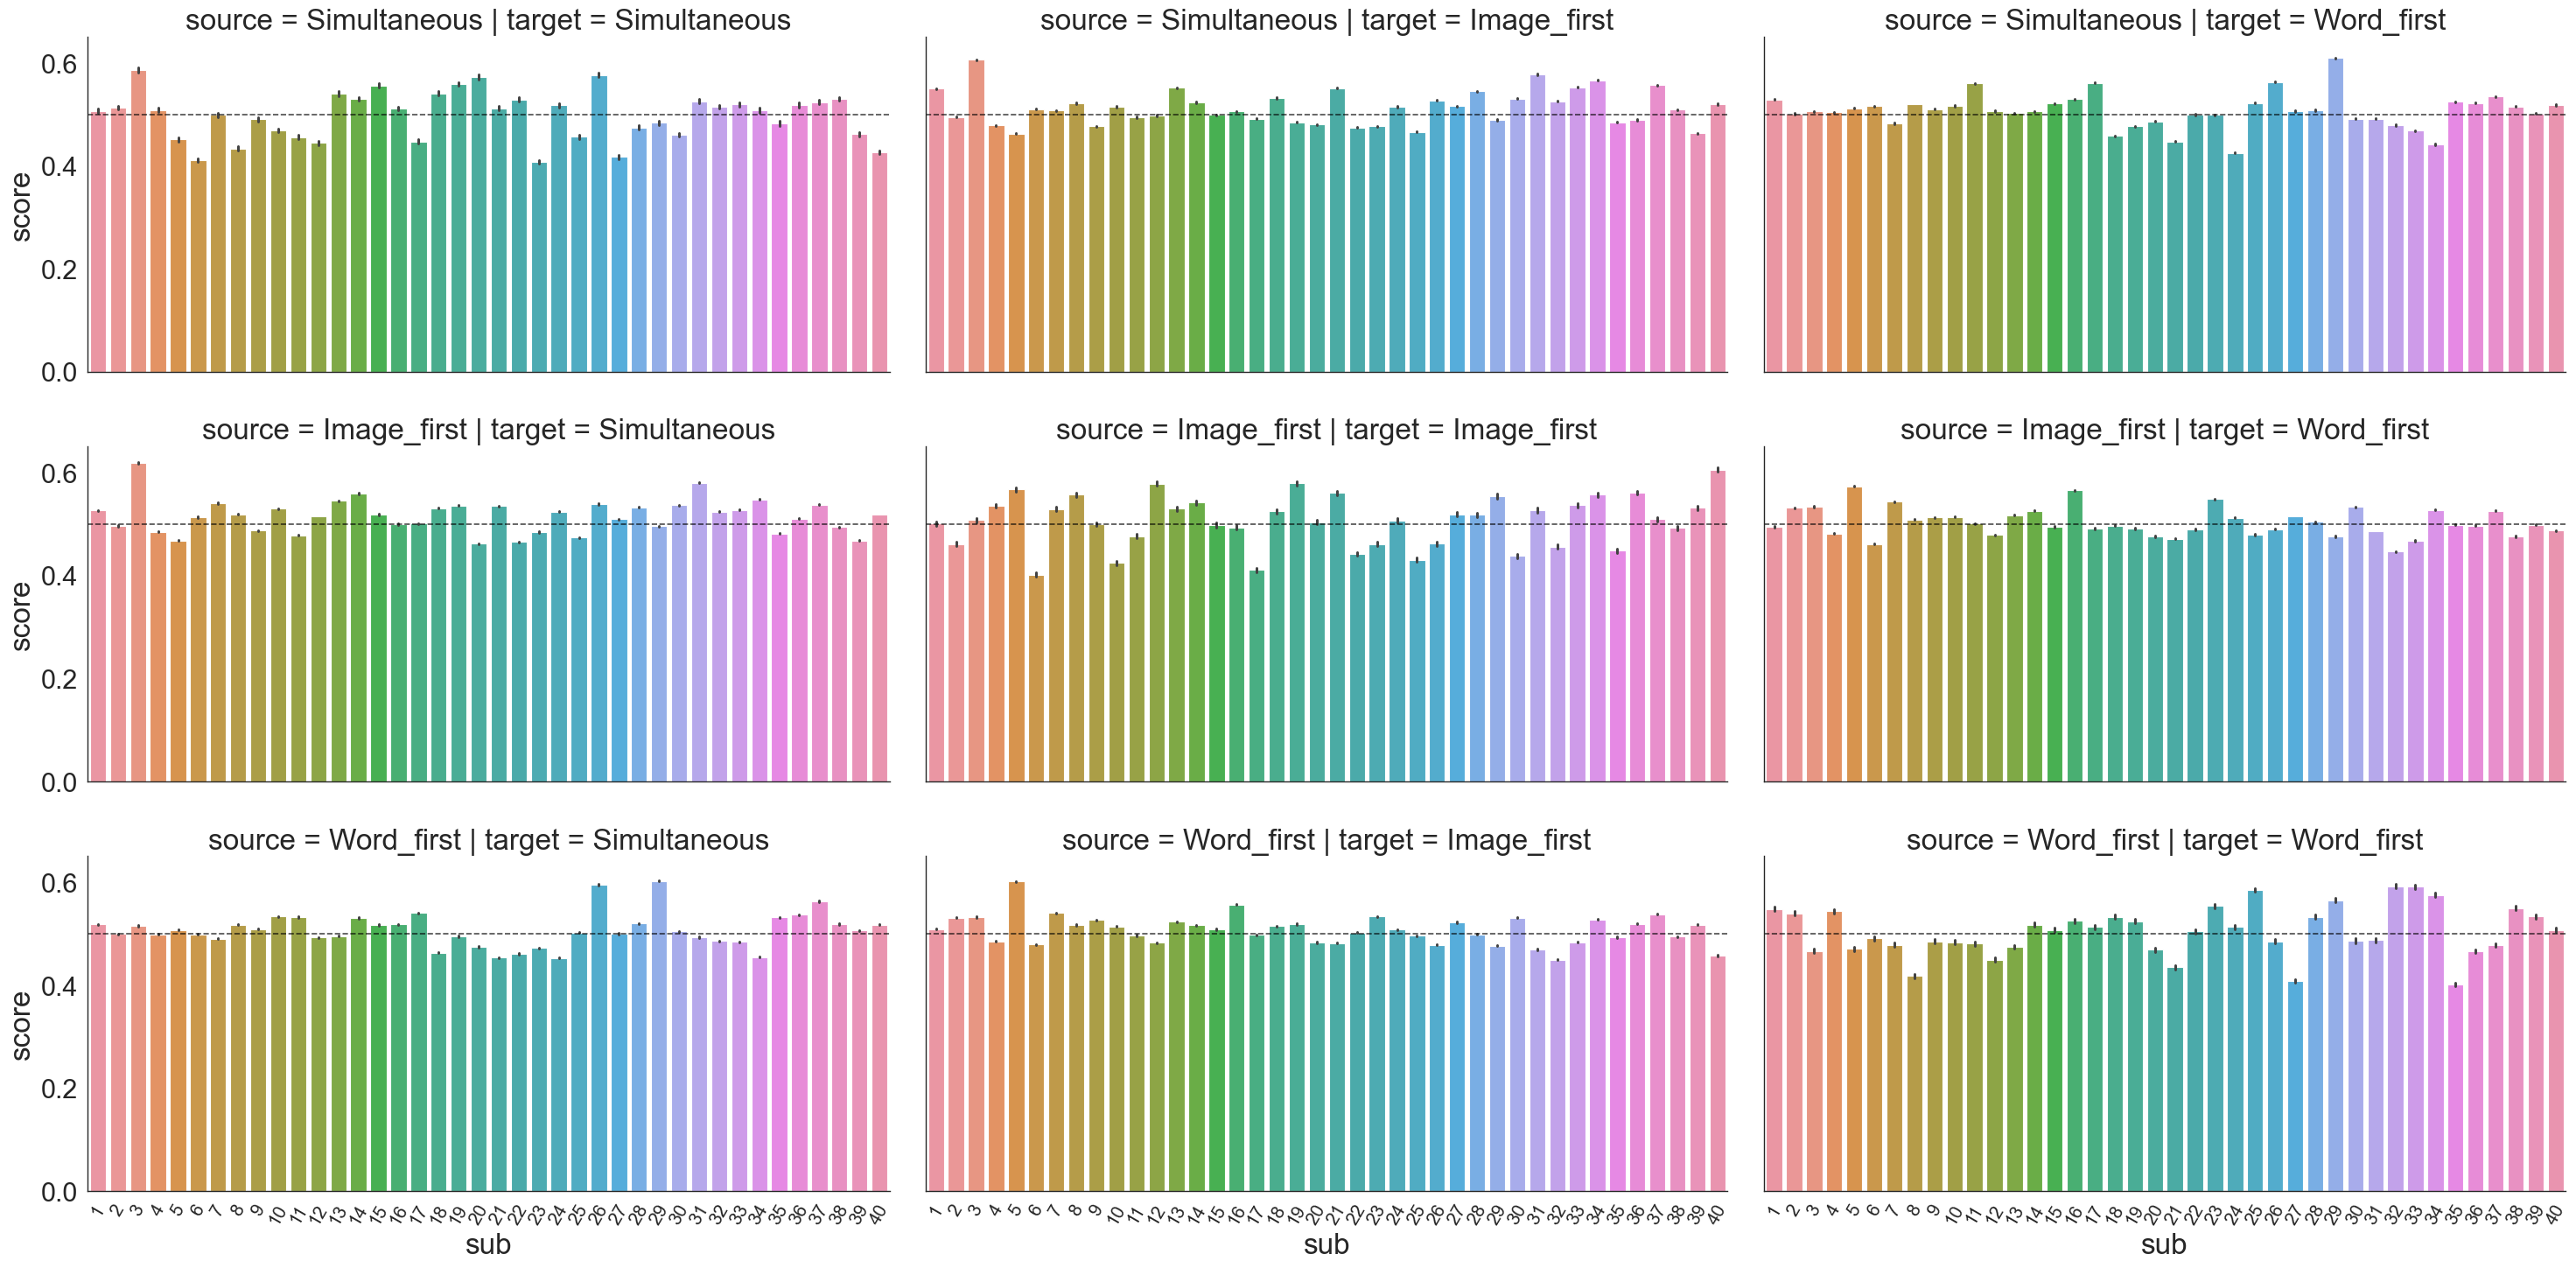

In [ ]:
r1 = sns.catplot(x="sub", y="score", data=df_result1, row="source", col="target", aspect=2, errorbar="se", kind="bar")
xtick_order = list(r1.axes[-1][-1].xaxis.get_majorticklabels())
[ax.set_xticklabels(xtick_order, rotation = 60, fontsize=15) for ax in r1.axes[-1]]
[ax.axhline(0.5, linestyle = '--',color = 'black',alpha = 0.7) for ax in r1.axes.flatten()]
plt.savefig("barplot_cro_con_tb_RF.png",dpi=300)

In [ ]:
groups2_img = df2_img["subj_idx"].values
groups2_word = df2_word["subj_idx"].values
groups2_sim = df2_sim["subj_idx"].values

In [ ]:
df_result2_si = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups2_img):
    idx_sub = groups2_img == sub
    feature_sub_img = X2_img[idx_sub]
    label_sub_img = y2_img[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    score = cross_validate(rf, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result2_si["sub"].append(sub)  
        df_result2_si["score"].append(s)
        df_result2_si["fold"].append(ii)
        df_result2_si["source"].append("Image_first")
        df_result2_si["target"].append("Image_first")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_w = y2_word[groups2_word == sub]
        y_pred_w = estimator.predict_proba(X2_word[groups2_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_result2_si["sub"].append(sub)  
        df_result2_si["score"].append(roc_w)
        df_result2_si["fold"].append(ii)
        df_result2_si["source"].append("Image_first")
        df_result2_si["target"].append("Word_first")
        
        y_true_s = y2_sim[groups2_sim == sub]
        y_pred_s = estimator.predict_proba(X2_sim[groups2_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_result2_si["sub"].append(sub)  
        df_result2_si["score"].append(roc_s)
        df_result2_si["fold"].append(ii)
        df_result2_si["source"].append("Image_first")
        df_result2_si["target"].append("Simultaneous")

df_result2_si=pd.DataFrame(df_result2_si)  

In [ ]:
df_result2_sw = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups2_word):
    idx_sub = groups2_word == sub
    feature_sub_word = X2_word[idx_sub]
    label_sub_word = y2_word[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    score = cross_validate(rf, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result2_sw["sub"].append(sub)  
        df_result2_sw["score"].append(s)
        df_result2_sw["fold"].append(ii)
        df_result2_sw["source"].append("Word_first")
        df_result2_sw["target"].append("Word_first")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_s = y2_sim[groups2_sim == sub]
        y_pred_s = estimator.predict_proba(X2_sim[groups2_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_result2_sw["sub"].append(sub)  
        df_result2_sw["score"].append(roc_s)
        df_result2_sw["fold"].append(ii)
        df_result2_sw["source"].append("Word_first")
        df_result2_sw["target"].append("Simultaneous")
        
        y_true_i = y2_img[groups2_img == sub]
        y_pred_i = estimator.predict_proba(X2_img[groups2_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_result2_sw["sub"].append(sub)  
        df_result2_sw["score"].append(roc_i)
        df_result2_sw["fold"].append(ii)
        df_result2_sw["source"].append("Word_first")
        df_result2_sw["target"].append("Image_first")

df_result2_sw=pd.DataFrame(df_result2_sw) 

In [ ]:
df_result2_ss = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups2_sim):
    idx_sub = groups2_sim == sub
    feature_sub_sim = X2_sim[idx_sub]
    label_sub_sim = y2_sim[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    score = cross_validate(rf, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result2_ss["sub"].append(sub)  
        df_result2_ss["score"].append(s)
        df_result2_ss["fold"].append(ii)
        df_result2_ss["source"].append("Simultaneous")
        df_result2_ss["target"].append("Simultaneous")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y2_img[groups2_img == sub]
        y_pred_i = estimator.predict_proba(X2_img[groups2_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_result2_ss["sub"].append(sub)  
        df_result2_ss["score"].append(roc_i)
        df_result2_ss["fold"].append(ii)
        df_result2_ss["source"].append("Simultaneous")
        df_result2_ss["target"].append("Image_first")
        
        y_true_w = y2_word[groups2_word == sub]
        y_pred_w = estimator.predict_proba(X2_word[groups2_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_result2_ss["sub"].append(sub)  
        df_result2_ss["score"].append(roc_w)
        df_result2_ss["fold"].append(ii)
        df_result2_ss["source"].append("Simultaneous")
        df_result2_ss["target"].append("Word_first")

df_result2_ss=pd.DataFrame(df_result2_ss) 

In [ ]:
df_result2 = pd.concat([df_result2_si, df_result2_ss, df_result2_sw])

In [ ]:
df_result2.to_csv('result2_cross_con_tb_RF.csv')

In [ ]:
r2 = sns.catplot(x="sub", y="score", data=df_result2, row="source", col="target", aspect=2, errorbar="se", kind="bar")
xtick_order = list(r2.axes[-1][-1].xaxis.get_majorticklabels())
[ax.set_xticklabels(xtick_order, rotation = 60, fontsize=15) for ax in r2.axes[-1]]
[ax.axhline(0.5, linestyle = '--',color = 'black',alpha = 0.7) for ax in r2.axes.flatten()]
plt.savefig("barplot_cro_con2_tb_RF.png",dpi=300)

In [ ]:
groups1_sim = df1_sim["subj_idx"].values
groups2_sim = df2_sim["subj_idx"].values
groups2_img = df2_img["subj_idx"].values
groups2_word = df2_word["subj_idx"].values

In [ ]:
df_croexp12_ss = dict(sub=[], score=[], fold=[], source=[], target=[], experiment=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_sim):
    idx_sub = groups1_sim == sub
    feature_sub_sim = X1_sim[idx_sub]
    label_sub_sim = y1_sim[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    score = cross_validate(rf, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y2_img[groups2_img == sub]
        y_pred_i = estimator.predict_proba(X2_img[groups2_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_croexp12_ss["sub"].append(sub)  
        df_croexp12_ss["score"].append(roc_i)
        df_croexp12_ss["fold"].append(ii)
        df_croexp12_ss["source"].append("Simultaneous")
        df_croexp12_ss["target"].append("Image_first")
        df_croexp12_ss["experiment"].append("exp1 → exp2")
        
        y_true_w = y2_word[groups2_word == sub]
        y_pred_w = estimator.predict_proba(X2_word[groups2_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_croexp12_ss["sub"].append(sub)  
        df_croexp12_ss["score"].append(roc_w)
        df_croexp12_ss["fold"].append(ii)
        df_croexp12_ss["source"].append("Simultaneous")
        df_croexp12_ss["target"].append("Word_first")
        df_croexp12_ss["experiment"].append("exp1 → exp2")

        y_true_s = y2_sim[groups2_sim == sub]
        y_pred_s = estimator.predict_proba(X2_sim[groups2_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_croexp12_ss["sub"].append(sub)  
        df_croexp12_ss["score"].append(roc_s)
        df_croexp12_ss["fold"].append(ii)
        df_croexp12_ss["source"].append("Simultaneous")
        df_croexp12_ss["target"].append("Simultaneous")
        df_croexp12_ss["experiment"].append("exp1 → exp2")


df_croexp12_ss=pd.DataFrame(df_croexp12_ss) 

In [ ]:
groups1_word = df1_word["subj_idx"].values
groups2_sim = df2_sim["subj_idx"].values
groups2_img = df2_img["subj_idx"].values
groups2_word = df2_word["subj_idx"].values

In [ ]:
df_croexp12_sw = dict(sub=[], score=[], fold=[], source=[], target=[], experiment=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_word):
    idx_sub = groups1_word == sub
    feature_sub_word = X1_word[idx_sub]
    label_sub_word = y1_word[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    score = cross_validate(rf, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y2_img[groups2_img == sub]
        y_pred_i = estimator.predict_proba(X2_img[groups2_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_croexp12_sw["sub"].append(sub)  
        df_croexp12_sw["score"].append(roc_i)
        df_croexp12_sw["fold"].append(ii)
        df_croexp12_sw["source"].append("Word_first")
        df_croexp12_sw["target"].append("Image_first")
        df_croexp12_sw["experiment"].append("exp1 → exp2")
        
        y_true_w = y2_word[groups2_word == sub]
        y_pred_w = estimator.predict_proba(X2_word[groups2_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_croexp12_sw["sub"].append(sub)  
        df_croexp12_sw["score"].append(roc_w)
        df_croexp12_sw["fold"].append(ii)
        df_croexp12_sw["source"].append("Word_first")
        df_croexp12_sw["target"].append("Word_first")
        df_croexp12_sw["experiment"].append("exp1 → exp2")

        y_true_s = y2_sim[groups2_sim == sub]
        y_pred_s = estimator.predict_proba(X2_sim[groups2_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_croexp12_sw["sub"].append(sub)  
        df_croexp12_sw["score"].append(roc_s)
        df_croexp12_sw["fold"].append(ii)
        df_croexp12_sw["source"].append("Word_first")
        df_croexp12_sw["target"].append("Simultaneous")
        df_croexp12_sw["experiment"].append("exp1 → exp2")


df_croexp12_sw=pd.DataFrame(df_croexp12_sw) 

In [ ]:
groups1_img = df1_img["subj_idx"].values
groups2_sim = df2_sim["subj_idx"].values
groups2_img = df2_img["subj_idx"].values
groups2_word = df2_word["subj_idx"].values

In [ ]:
df_croexp12_si = dict(sub=[], score=[], fold=[], source=[], target=[], experiment=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_img):
    idx_sub = groups1_img == sub
    feature_sub_img = X1_img[idx_sub]
    label_sub_img = y1_img[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    score = cross_validate(rf, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y2_img[groups2_img == sub]
        y_pred_i = estimator.predict_proba(X2_img[groups2_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_croexp12_si["sub"].append(sub)  
        df_croexp12_si["score"].append(roc_i)
        df_croexp12_si["fold"].append(ii)
        df_croexp12_si["source"].append("Image_first")
        df_croexp12_si["target"].append("Image_first")
        df_croexp12_si["experiment"].append("exp1 → exp2")
        
        y_true_w = y2_word[groups2_word == sub]
        y_pred_w = estimator.predict_proba(X2_word[groups2_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_croexp12_si["sub"].append(sub)  
        df_croexp12_si["score"].append(roc_w)
        df_croexp12_si["fold"].append(ii)
        df_croexp12_si["source"].append("Image_first")
        df_croexp12_si["target"].append("Word_first")
        df_croexp12_si["experiment"].append("exp1 → exp2")

        y_true_s = y2_sim[groups2_sim == sub]
        y_pred_s = estimator.predict_proba(X2_sim[groups2_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_croexp12_si["sub"].append(sub)  
        df_croexp12_si["score"].append(roc_s)
        df_croexp12_si["fold"].append(ii)
        df_croexp12_si["source"].append("Image_first")
        df_croexp12_si["target"].append("Simultaneous")
        df_croexp12_si["experiment"].append("exp1 → exp2")


df_croexp12_si=pd.DataFrame(df_croexp12_si) 

In [ ]:
groups2_sim = df2_sim["subj_idx"].values
groups1_sim = df1_sim["subj_idx"].values
groups1_img = df1_img["subj_idx"].values
groups1_word = df1_word["subj_idx"].values

In [ ]:
df_croexp21_ss = dict(sub=[], score=[], fold=[], source=[], target=[], experiment=[])# source拟合的，target预测的condition
for sub in np.unique(groups2_sim):
    idx_sub = groups2_sim == sub
    feature_sub_sim = X2_sim[idx_sub]
    label_sub_sim = y2_sim[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    score = cross_validate(rf, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y1_img[groups1_img == sub]
        y_pred_i = estimator.predict_proba(X1_img[groups1_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_croexp21_ss["sub"].append(sub)  
        df_croexp21_ss["score"].append(roc_i)
        df_croexp21_ss["fold"].append(ii)
        df_croexp21_ss["source"].append("Simultaneous")
        df_croexp21_ss["target"].append("Image_first")
        df_croexp21_ss["experiment"].append("exp2 → exp1")
        
        y_true_w = y1_word[groups1_word == sub]
        y_pred_w = estimator.predict_proba(X1_word[groups1_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_croexp21_ss["sub"].append(sub)  
        df_croexp21_ss["score"].append(roc_w)
        df_croexp21_ss["fold"].append(ii)
        df_croexp21_ss["source"].append("Simultaneous")
        df_croexp21_ss["target"].append("Word_first")
        df_croexp21_ss["experiment"].append("exp2 → exp1")

        y_true_s = y1_sim[groups1_sim == sub]
        y_pred_s = estimator.predict_proba(X1_sim[groups1_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_croexp21_ss["sub"].append(sub)  
        df_croexp21_ss["score"].append(roc_s)
        df_croexp21_ss["fold"].append(ii)
        df_croexp21_ss["source"].append("Simultaneous")
        df_croexp21_ss["target"].append("Simultaneous")
        df_croexp21_ss["experiment"].append("exp2 → exp1")


df_croexp21_ss=pd.DataFrame(df_croexp21_ss) 

In [ ]:
groups2_word = df2_word["subj_idx"].values
groups1_sim = df1_sim["subj_idx"].values
groups1_img = df1_img["subj_idx"].values
groups1_word = df1_word["subj_idx"].values

In [ ]:
df_croexp21_sw = dict(sub=[], score=[], fold=[], source=[], target=[], experiment=[])# source拟合的，target预测的condition
for sub in np.unique(groups2_word):
    idx_sub = groups2_word == sub
    feature_sub_word = X2_word[idx_sub]
    label_sub_word = y2_word[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    score = cross_validate(rf, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y1_img[groups1_img == sub]
        y_pred_i = estimator.predict_proba(X1_img[groups1_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_croexp21_sw["sub"].append(sub)  
        df_croexp21_sw["score"].append(roc_i)
        df_croexp21_sw["fold"].append(ii)
        df_croexp21_sw["source"].append("Word_first")
        df_croexp21_sw["target"].append("Image_first")
        df_croexp21_sw["experiment"].append("exp2 → exp1")
        
        y_true_w = y1_word[groups1_word == sub]
        y_pred_w = estimator.predict_proba(X1_word[groups1_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_croexp21_sw["sub"].append(sub)  
        df_croexp21_sw["score"].append(roc_w)
        df_croexp21_sw["fold"].append(ii)
        df_croexp21_sw["source"].append("Word_first")
        df_croexp21_sw["target"].append("Word_first")
        df_croexp21_sw["experiment"].append("exp2 → exp1")

        y_true_s = y1_sim[groups1_sim == sub]
        y_pred_s = estimator.predict_proba(X1_sim[groups1_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_croexp21_sw["sub"].append(sub)  
        df_croexp21_sw["score"].append(roc_s)
        df_croexp21_sw["fold"].append(ii)
        df_croexp21_sw["source"].append("Word_first")
        df_croexp21_sw["target"].append("Simultaneous")
        df_croexp21_sw["experiment"].append("exp2 → exp1")


df_croexp21_sw=pd.DataFrame(df_croexp21_sw) 

In [ ]:
groups2_img = df2_img["subj_idx"].values
groups1_sim = df1_sim["subj_idx"].values
groups1_img = df1_img["subj_idx"].values
groups1_word = df1_word["subj_idx"].values

In [ ]:
df_croexp21_si = dict(sub=[], score=[], fold=[], source=[], target=[], experiment=[])# source拟合的，target预测的condition
for sub in np.unique(groups2_img):
    idx_sub = groups2_img == sub
    feature_sub_img = X2_img[idx_sub]
    label_sub_img = y2_img[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    rf = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=123, class_weight="balanced", criterion = "entropy", max_samples=0.9, n_jobs=-1))
    score = cross_validate(rf, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y1_img[groups1_img == sub]
        y_pred_i = estimator.predict_proba(X1_img[groups1_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_croexp21_si["sub"].append(sub)  
        df_croexp21_si["score"].append(roc_i)
        df_croexp21_si["fold"].append(ii)
        df_croexp21_si["source"].append("Image_first")
        df_croexp21_si["target"].append("Image_first")
        df_croexp21_si["experiment"].append("exp2 → exp1")
        
        y_true_w = y1_word[groups1_word == sub]
        y_pred_w = estimator.predict_proba(X1_word[groups1_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_croexp21_si["sub"].append(sub)  
        df_croexp21_si["score"].append(roc_w)
        df_croexp21_si["fold"].append(ii)
        df_croexp21_si["source"].append("Image_first")
        df_croexp21_si["target"].append("Word_first")
        df_croexp21_si["experiment"].append("exp2 → exp1")

        y_true_s = y1_sim[groups1_sim == sub]
        y_pred_s = estimator.predict_proba(X1_sim[groups1_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_croexp21_si["sub"].append(sub)  
        df_croexp21_si["score"].append(roc_s)
        df_croexp21_si["fold"].append(ii)
        df_croexp21_si["source"].append("Image_first")
        df_croexp21_si["target"].append("Simultaneous")
        df_croexp21_si["experiment"].append("exp2 → exp1")


df_croexp21_si=pd.DataFrame(df_croexp21_si) 

In [ ]:
df_cro = pd.concat([df_croexp12_si, df_croexp12_ss, df_croexp12_sw, df_croexp21_si, df_croexp21_ss, df_croexp21_sw])

In [ ]:
df_cro.to_csv("Cross_Exp_tb_RF.csv")

In [ ]:
f_cro = sns.catplot(x="sub", y="score", data=df_cro, row="source", col="target", aspect=2, kind="bar", hue="experiment", errorbar="se", palette=sns.color_palette("Dark2"))
xtick_order = list(f_cro.axes[-1][-1].xaxis.get_majorticklabels())
[ax.set_xticklabels(xtick_order, rotation = 60, fontsize=15) for ax in f_cro.axes[-1]]
[ax.axhline(0.5, linestyle = '--',color = 'black',alpha = 0.7) for ax in f_cro.axes.flatten()]
plt.savefig("barplot_cro_exp_tb_RF.png",dpi=300)